### HW assignment by Valeria Jimenez Schiavon @valschi
### based on scheleton & instruction notebook by Federica B. Bianco @fedhere
### NYU CUSP PUI

- ### GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
### _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
- ### For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
- ### Describe the behavior you see in the plots in terms of the law of large numbers.
- ### PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
### Extra Credit: FIT a gaussian to the distribution of means 

In [1]:
from __future__ import print_function
__author__= 'vjs'

import numpy as np
import pandas as pd
import pylab as pl

import seaborn

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


#### Setting the mean to use, and create an array of 100 for the 100 samples of different sizes

In [2]:
mymean = 450
np.random.seed(150)
md = {}
mysize = (np.random.rand(100)*2000).astype(int)

#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
print (mysize, mysize.shape)

[1817  515 1755 1477 1396 1034 1904 1827  156 1564  227 1281  159  463  771
  473 1996  778 1447  903  953 1090  865 1179  209 1722  616  973  420 1240
  682  989  614  835 1520   81  999 1625 1040  863 1477 1485 1761 1965  439
  186  291  821  716 1943 1314 1343 1480 1274 1794  638  236  459  205 1943
  926  427  908 1998  197  474  268 1449  686  176 1671  238   70  363 1945
  426 1000 1681  919 1575  385  411 1803 1256  692  922 1211  321 1451  319
  874  664  741 1105  369  615  183 1552 1332  798] (100,)


# Samples with Chi Squared Distribution below:

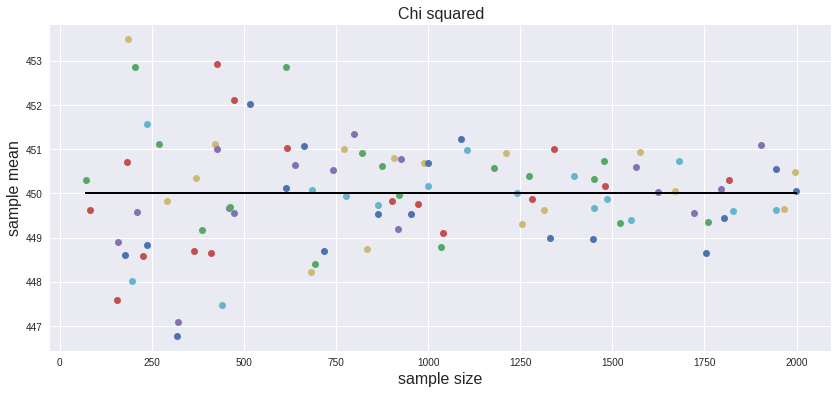

In [3]:
# Nested dictionary: the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

df = mymean
#and do it in a for loop. not pythonic, but easily readable
np.random.seed(150)

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(14,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=16)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=16)
        axchisq_mu_n.set_title('Chi squared', fontsize=16)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

#### Figure 1: We can see that as the sample size increases (towards 2000) the mean of the sample approaches the mean of the population. (Mean of the population has been set up to 450). 

In [4]:
len(md['chisq']['means'])

98

# Samples with Normal Distribution below:

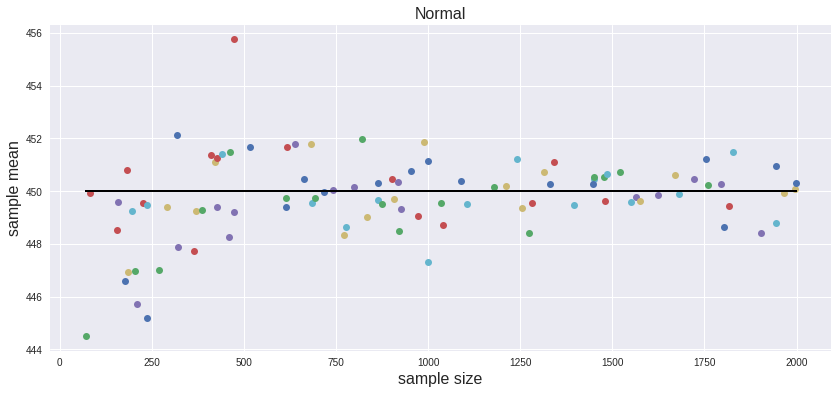

In [5]:
md['normal'] = {} 
loc = mymean
#and do it in a for loop. not pythonic, but easily readable

np.random.seed(150)
for n in mysize:
    md['normal'][n] = np.random.normal(loc,37,size=n)
    
# save the means for plotting later    

md['normal']['means'] = {}
axnormal_mu_n = pl.figure(figsize=(14,6)).add_subplot(111)

for nn in md['normal']:
    if not type(nn) == str:
        md['normal']['means'][nn] = md['normal'][nn].mean()
        #and plot it
        axnormal_mu_n.plot(nn, md['normal']['means'][nn], 'o')
        axnormal_mu_n.set_xlabel('sample size', fontsize=16)
        axnormal_mu_n.set_ylabel('sample mean', fontsize=16)
        axnormal_mu_n.set_title('Normal', fontsize=16)
        axnormal_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

#### Figure 2: With the Normal distribution we can see the same behaviour.  Even though the distribution for each sample is a normal distribution in this case, the means of each sample approach the mean of the population (450)

In [6]:
len(md['normal']['means'])

98

# Samples with Poisson Distribution below:

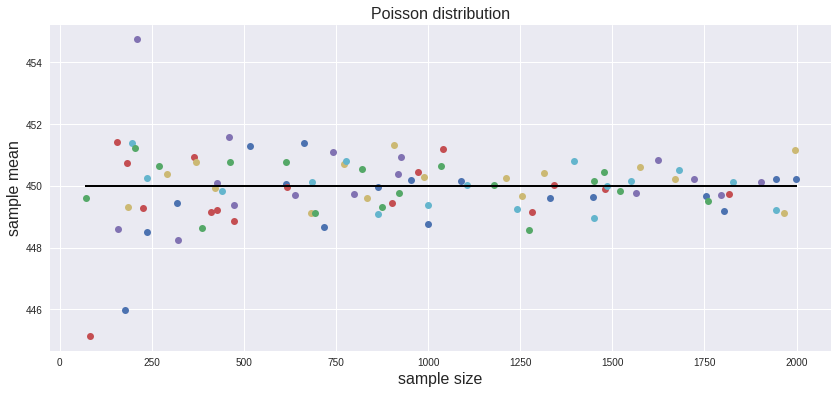

In [7]:
np.random.seed(150)
md['poisson'] = {} 

#and do it in a for loop. not pythonic, but easily readable
np.random.seed(150)

lam=mymean
for n in mysize:
    md['poisson'][n] = np.random.poisson(lam,size=n)
    
# save the means for plotting later    

md['poisson']['means'] = {}
axpoisson_mu_n = pl.figure(figsize=(14,6)).add_subplot(111)

for nn in md['poisson']:
    if not type(nn) == str:
        md['poisson']['means'][nn] = md['poisson'][nn].mean()
        #and plot it
        axpoisson_mu_n.plot(nn, md['poisson']['means'][nn], 'o')
        axpoisson_mu_n.set_xlabel('sample size', fontsize=16)
        axpoisson_mu_n.set_ylabel('sample mean', fontsize=16)
        axpoisson_mu_n.set_title('Poisson distribution', fontsize=16)
        axpoisson_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

#### Figure 3: The above graph contains the means of a 100 different Poisson distributions, all with different sample sizes. Yet, it shows the same fenomenon on which the larger the sample size the closer the mean gets to the population mean.

In [8]:
len(md['poisson']['means'])

98

# Samples with Binomial Distribution below:

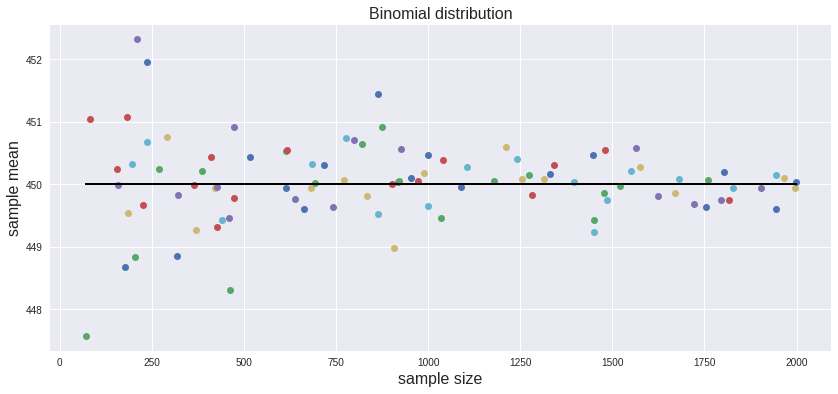

In [9]:
np.random.seed(200)
md['binom'] = {} 


probTrials = 0.6
numTrials = mymean/probTrials
#and do it in a for loop. not pythonic, but easily readable
np.random.seed(150)

for n in mysize:
    md['binom'][n] = np.random.binomial(numTrials,probTrials,size=n)
    
# save the means for plotting later    

md['binom']['means'] = {}
axbinom_mu_n = pl.figure(figsize=(14,6)).add_subplot(111)

for nn in md['binom']:
    if not type(nn) == str:
        md['binom']['means'][nn] = md['binom'][nn].mean()
        #and plot it
        axbinom_mu_n.plot(nn, md['binom']['means'][nn], 'o')
        axbinom_mu_n.set_xlabel('sample size', fontsize=16)
        axbinom_mu_n.set_ylabel('sample mean', fontsize=16)
        axbinom_mu_n.set_title('Binomial distribution', fontsize=16)
        axbinom_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

#### Figure 4: With the Binomial distribution, even though the behaviour is less obvious than the past charts of the other distributions, still we can see the larger the sample size the closer the mean is to the Population mean

# Samples with Gumbel Distribution below:

In [10]:
stand_dev = 37
beta = stand_dev*np.sqrt(6)/np.pi
locm = mymean + beta
print (beta)
print (locm)

28.8487816456
478.848781646


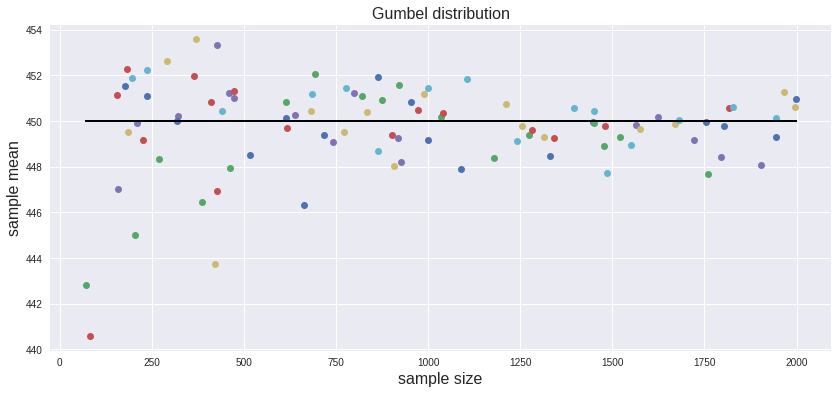

In [11]:
np.random.seed(200)
md['gumbel'] = {} 

#gumbel needs loc: the location of the mode, scale: the scale param(beta), and size
#loc of mode = mean + Beta*(euler constant)

gamma = 0.577215664901532860606512090082
stand_dev = 37
beta = (stand_dev*np.sqrt(6))/np.pi
locm = mymean - (beta*gamma)

#and do it in a for loop. not pythonic, but easily readable

#np.random.gumbel?
np.random.seed(150)

for n in mysize:
    md['gumbel'][n] = np.random.gumbel(locm,beta,size=n)
    
# save the means for plotting later    

md['gumbel']['means'] = {}
axgumbel_mu_n = pl.figure(figsize=(14,6)).add_subplot(111)

for nn in md['gumbel']:
    if not type(nn) == str:
        md['gumbel']['means'][nn] = md['gumbel'][nn].mean()
        #and plot it
        axgumbel_mu_n.plot(nn, md['gumbel']['means'][nn], 'o')
        axgumbel_mu_n.set_xlabel('sample size', fontsize=16)
        axgumbel_mu_n.set_ylabel('sample mean', fontsize=16)
        axgumbel_mu_n.set_title('Gumbel distribution', fontsize=16)
        axgumbel_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')

#### Figure 5: This time with Gumbel distribution which uses the Euler constant we can se that the means of the sample do approach the mean of the populationas the size of the sample increases. 

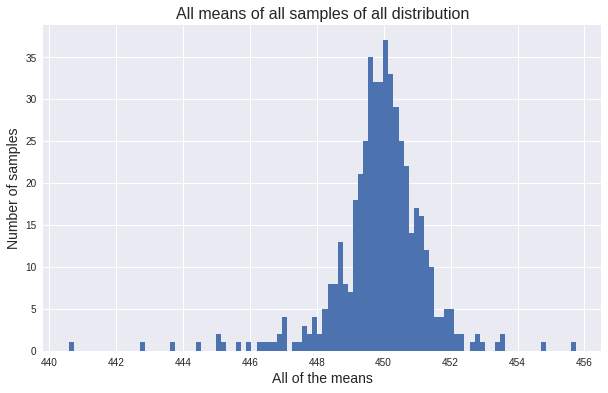

In [12]:
allmeans = list(md['chisq']['means'].values()+
                (md['normal']['means'].values())+
                (md['binom']['means'].values())+
                (md['poisson']['means'].values())+
                (md['gumbel']['means'].values())
                )

pl.figure(figsize=(10,6)).add_subplot(111)
pl.hist(allmeans,bins=100)


pl.xlabel('All of the means', fontsize=14)
pl.ylabel('Number of samples', fontsize=14)
pl.title('All means of all samples of all distribution', fontsize=16);

### Figure6: We can see that considering all of the samples of all of the distributions the graph does resemble a Gaussian curve withe the normal distribution. Where the mean is around 450, which is the population mean